In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
import math
import os
import sys
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [15]:
filename='X_train.csv'

%time X_train = pd.read_csv('X_train.csv')
%time y_train = pd.read_csv('y_train.csv', names=['Demanda_uni_equil'])
%time X_test  = pd.read_csv('X_test.csv')
%time y_test  = pd.read_csv('y_test.csv', names=['Demanda_uni_equil'])
X_train

CPU times: user 56 ms, sys: 2.53 ms, total: 58.5 ms
Wall time: 56.8 ms
CPU times: user 7.61 ms, sys: 0 ns, total: 7.61 ms
Wall time: 6.19 ms
CPU times: user 27.2 ms, sys: 627 µs, total: 27.8 ms
Wall time: 26.4 ms
CPU times: user 4.33 ms, sys: 0 ns, total: 4.33 ms
Wall time: 3.8 ms


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Town,State_0,State_1,State_2,State_3,State_4,State_5
0,6,1332,1,1117,544559,1242,4.898649,0,0,1,0,1,1
1,8,2215,1,5002,310025,45143,8.561562,0,1,0,1,1,1
2,9,3212,1,1016,4242746,4910,5.676667,0,0,0,0,1,0
3,8,2012,1,1191,7927107,1064,4.460043,0,0,1,1,0,0
4,6,1338,1,1209,1008869,1242,7.164000,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64606,8,1628,1,1283,2478587,48417,11.919872,0,0,0,1,1,0
64607,5,1344,1,1204,2148440,35651,6.378378,0,1,1,1,1,0
64608,6,1998,1,2164,603140,4085,19.165000,0,0,1,0,1,0
64609,9,1955,1,1113,904615,1309,7.522321,0,1,0,0,1,1


In [30]:
def rmsle(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)
    y_true = np.maximum(y_true, 0)
    res = math.sqrt(mean_squared_log_error(y_true, y_pred))
    return res

## XGBRegressor

In [17]:
score_rmsle = make_scorer(rmsle, greater_is_better=False)

parameters = {
    'n_estimators':[400, 500],
    'max_depth':[10, 20],
    'learning_rate': [0.01,0.05],
    'colsample_bytree': [0.5,0.6],
    }

xgbr = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist', gpu_id=0) 
xgbr_grid = GridSearchCV(xgbr, parameters, scoring=score_rmsle, cv=3, verbose=2)

xgbr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, total=  11.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, total=  10.0s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, total=   9.7s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, total=  12.8s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, total=  12.5s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, total=  12.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=400 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=400, total= 3.8min
[CV] colsample_bytree=0.5, learning_rate=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 101.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, r...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, tree_method='gpu_hist',
                                    verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.6],
                     

In [18]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

In [31]:
rmsle(xgbr_grid.predict(X_test),y_test)

0.556337243036246

In [34]:
xgbr_best=xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist', gpu_id=0, **xgbr_grid.best_params_)
xgbr_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

In [35]:
rmsle(xgbr_best.predict(X_test),y_test)#RandomForest = 0.6684

0.556337243036246

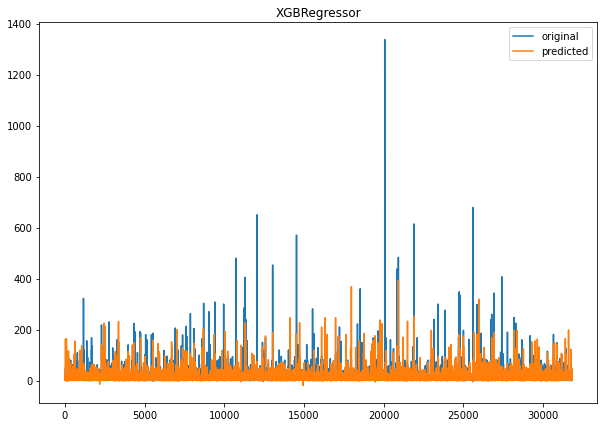

In [36]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,7))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgbr_best.predict(X_test), label="predicted")
plt.title('XGBRegressor')
plt.legend()
plt.show()